# Utils

In [51]:
import numpy as np

In [52]:
from typing import Literal, Iterable

In [53]:
def _split_list(data: Iterable,
                part_size: int,
                handle_leftover: Literal["cut", "join", "add"] = "cut"
                ) -> list[list]:
    """Split list into sublists of equal size.

        If length of initial list isn't divisible by given
        sublist size, the remaining part won't be included
        in result by default. However, changing
        'handle_leftover' parameter will modify this.
        Parameters
        ----------
        data : Iterable
        part_size : int
            Size of sublists data will be splitted in
        handle_leftover: Literal["cut", "join", "add"]
            Set remaining part handling mode. (default is "cut")
            - 'cut': don't include remaining part
            - 'join': join remaining part to the last full sublist
            - 'add': add the remaining part to the result as last sublist
    """
    sublists: list[int] = []
    sublist = [data[0]]
    for i in range(1, len(data)):
        if i % part_size == 0:
            sublists.append(sublist)
            sublist = []
        else:
            sublist.append(data[i])

    remaining_part = data[-(len(data) % part_size):]
    print(len(remaining_part))
    if remaining_part:
        if handle_leftover == "join":
            sublists[-1].extend(remaining_part)
        elif handle_leftover == "add":
            sublists.append(remaining_part)
    return sublists

In [54]:
def filter_values(lst, exclude = (), less_than: float = np.inf, greater_than: float = -np.inf):
  """Drop values in numeric iterable that don't meet the condition

     Parameters
     ----------
     list: list
     exclude: Iterable, optional
        Exact values that will be dropped (default is ())
      less_than: float, optional
        Keep values below this value (default is np.inf)
      greater_than: float, optional
        Keep values above this value (default is -np.inf)"""

  res = []
  for i in lst:
    if i not in exclude and i < less_than and i > greater_than:
      res.append(i)
  return res

# Translating


In [55]:
LANGUAGE = 'ru'#en/ru

In [56]:
to_russian = {'*-': 'А',
 '-***': 'Б',
 '*--': 'В',
 '--*': 'Г',
 '-**': 'Д',
 '*': 'Е',
 '***-': 'Ж',
 '--**': 'З',
 '**': 'И',
 '*---': 'Й',
 '-*-': 'К',
 '*-**': 'Л',
 '--': 'М',
 '-*': 'Н',
 '---': 'О',
 '*--*': 'П',
 '*-*': 'Р',
 '***': 'С',
 '-': 'Т',
 '**-': 'У',
 '**-*': 'Ф',
 '****': 'Х',
 '-*-*': 'Ц',
 '---*': 'Ч',
 '----': 'Ш',
 '--*-': 'Щ',
 '--*--': 'Ъ',
 '-*--': 'Ы',
 '-**-': 'Ь',
 '**-**': 'Э',
 '**--': 'Ю',
 '*-*-': 'Я'}

In [57]:
to_english = {'*-': 'A',
 '-***': 'B',
 '-*-*': 'C',
 '-**': 'D',
 '*': 'E',
 '**-*': 'F',
 '--*': 'G',
'****': 'H',
 '**': 'I',
 '*---': 'J',
 '-*-': 'K',
 '*-**': 'L',
 '--': 'M',
 '-*': 'N',
 '---': 'O',
 '*--*': 'P',
 '--*-': 'Q',
 '*-*': 'R',
 '***': 'S',
 '-': 'T',
 '**-': 'U',
 '***-': 'V',
 '*--': 'W',
 '-**-': 'X',
 '-*--': 'Y',
 '--**': 'Z'}

In [58]:
if LANGUAGE == 'en':
  from_morse = to_english
elif LANGUAGE == 'ru':
  from_morse = to_russian

In [59]:
def translate_from_morse(code: str,
                         handle_unknown: Literal["warn", "error"] = "warn",
                         word_separator: str = ' '*2,
                         letter_separator: str = ' '):
  morse_words: list[str] = code.split(word_separator)
  morse_words: list[list[str]] = [word.split(letter_separator)  for word in morse_words]
  result = ''
  for morse_word in morse_words:
    for morse_letter in morse_word:
      if morse_letter in from_morse:
        result += from_morse[morse_letter]
      else:
        if handle_unknown == "warn":
          result += '?'
        else:
          raise ValueError(f"Morse letter not recognised: {morse_letter}")
    result += ' '
  return result.capitalize()

# EMG analysis

## Downloading data

In [60]:
%pip install pyedflib

2813.21s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Note: you may need to restart the kernel to use updated packages.


In [61]:
import pyedflib
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

In [62]:
file_name='core/test_data/мама мыла раму/260424200650165.edf'
f = pyedflib.EdfReader(file_name)

FileNotFoundError: core/test_data/мама мыла раму/260424200650165.edf: can not open file, no such file or directory

In [ ]:
data = f.readSignal(0)
data_origin = data.copy()

NameError: name 'f' is not defined

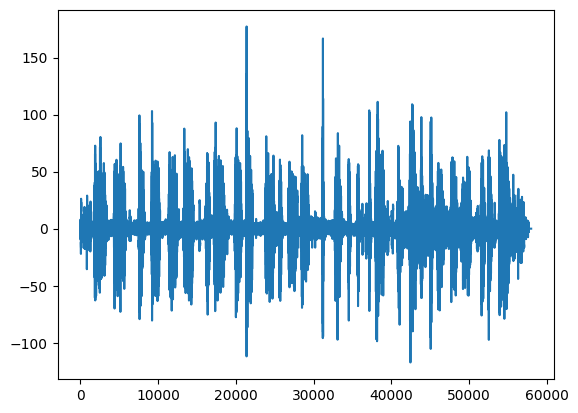

In [ ]:
plt.plot(range(len(data)), data)

In [ ]:
data = [i if i > 0 else 0 for i in data]

In [ ]:
data_origin = data.copy()

In [ ]:
NOISE_BELOW = 10

In [ ]:
symbol_to_signal_type = {' ': 0, '*': 1, '-': 2}#none, low, high

## Approximation

In [ ]:
def round_by(n,by):
  return n // by * by

In [ ]:
APPROXIMATION = 30
approximated = [round_by(i,APPROXIMATION) for i in data]
values, distribution = np.unique(approximated, return_counts = True)
value_distribution = dict(zip(values, distribution))

## Getting peaks

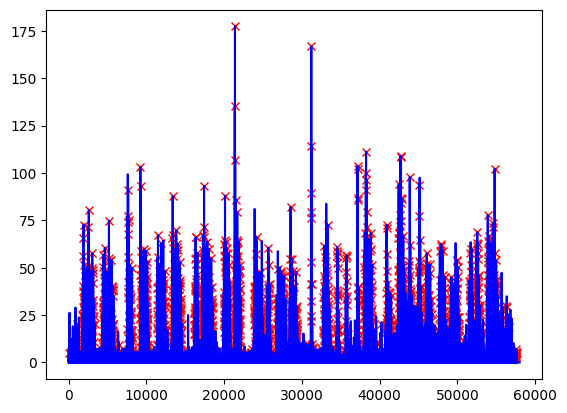

In [ ]:
peaks, _ = find_peaks(data,threshold = 2,height=0)
plt.plot(peaks, [data[peak] for peak in peaks],"x",c='r')
plt.plot([i for i in range(len(data))], data,c='b')
plt.show()

# Calibration

In [ ]:
data_origin = data.copy()

In [ ]:
file_name='/content/drive/MyDrive/ADT/signal analysis/260424200650165.edf'
#f = pyedflib.EdfReader(file_name)
data = f.readSignal(0)
data = [i if i > 0 else 0 for i in data]
data = data[1400:]# beginning is just nothing
CALIBRATION_CODE = '-- .- -- .-  -- -.-- .-.. .-  .-. .- -- ..-'.replace('.', '*')
CALIBRATION_TRANSLATION = translate_from_morse(CALIBRATION_CODE)
CALIBRATION_TRANSLATION

'Мама мыла раму '

## Filtering data


In [ ]:
def high_low_batch_filter(data, threshold, batch_size):
  """Divide data in batches, and for each part count values under and over threshold.
     Values with lower counts will be replaced by mean of predominant values
  """

  filtered_data = []
  for batch in _split_list(data, batch_size, handle_leftover = 'add'):
      below = filter_values(batch, less_than = threshold)
      over = filter_values(batch, greater_than = threshold)

      predominant = below if len(below) > len(over) else over
      predominant_mean = np.mean(predominant)

      filtered_batch = [i if i in predominant else predominant_mean for i in batch]#TODO: compare by threshold to save time
      filtered_data.extend(filtered_batch)

  return filtered_data

In [ ]:
EPOCH_TIME = len(data) // len(CALIBRATION_CODE)
TIMING_ERROR = EPOCH_TIME//5
EPOCH_TIME,TIMING_ERROR

(1307, 261)

In [ ]:
plt.plot(range(len(data)), high_low_batch_filter(data, NOISE_BELOW, EPOCH_TIME))

NameError: name 'data' is not defined

## Getting exact start time

In [ ]:
USER_ACTION__MAX_OFFSET = 400# time for user to make the first action
first_action_time = np.argmax(data[:USER_ACTION__MAX_OFFSET])
first_action_value = np.max(data[:USER_ACTION__MAX_OFFSET])

data = data[first_action_time:]
first_action_time, first_action_value

(141, 72.78886650796558)

In [ ]:
epochs = [data[max(i - TIMING_ERROR,0): min(len(data), i + EPOCH_TIME + TIMING_ERROR)]# min and max not to exсeed list boundaries
          for i in range(0,len(data), EPOCH_TIME)]#extend epochs at both ends to accept data that user entered at wrong timing

## Classifying

In [ ]:
if len(epoch_values) > len(CALIBRATION_CODE):
  epoch_values.pop(-1)#TODO: do smth if there are more epochs than symbols
epoch_to_signal_type
epoch_to_signal_type = dict(zip(epoch_values,
                        [symbol_to_signal_type[i] for i in CALIBRATION_CODE]))

# Classifying epochs

In [ ]:
'''Get morse code from data based on threshold to say whether it's a dot(low threshold), or dash(high)
      --------
      param high_threshold: a value, epoch will be considered as dash
      param low_threshold: a value, based on which an epoch will be considered as dash
      potom napishy koroche'''

In [ ]:
def data_to_morse(data: list[float],
                  high_threshold: float,
                  low_threshold: float,
                  epoch_size: int):
  res: str = ""
  epochs = _split_list(data, epoch_size)
  for epoch in epochs:
    median = np.median(epoch)
    if median > high_threshold:
      res += '-'
    elif median > low_threshold:
      res += '*'
    else:
      res += ' '
  return res

In [ ]:
EPOCH_SIZE = 50
morse_code = data_to_morse(data,
              HIGH_THRESHOLD,
              LOW_THRESHOLD,
              EPOCH_SIZE
              )

translate_from_morse(morse_code, handle_unknown = "warn")